**Có 3 phương pháp tạo đặc trưng**
1. *Trích chọn đặc trưng*: trích chọn những thông tin mang lại giá trị trong việc phân loại, áp dụng trong một số dạng dữ liệu như: 
- Trích chọn đặc trưng trong xla và NLP: Các mạng nơ ron sẽ trích lọc những đặc trưng chính và học từ những đặc trưng này để thực hiện tác vụ phân loại
- Dữ liệu về vị trí địa lí 
- Dữ liệu về thời gian
2. *Biến đổi feature* : Biến dữ liệu gốc thành những dữ liệu phù hợp với mô hình nghiên cứu >> cải thiện acc của mô hình
Các phương pháp bao gồm:
- Chuẩn hóa và thay đổi phân phối của dữ liệu thông qua các kĩ thuật feature scaling: Minmax scaling, mean normanization, Unit length scaling, standardization
- Tạo biến tương tác: Trong thống kê các bạn hẳn còn nhớ kiểm định ramsey reset test về mô hình có bỏ sót biến quan trọng? Thông qua việc thêm vào mô hình các biến bậc cao và biến tương tác để tạo ra một mô hình mới và kiểm tra hệ số các biến mới có ý nghĩa thống kê hay không. Ý tưởng của tạo biến tương tác cũng gần như thế. Tức là chúng ta sẽ tạo ra những biến mới là các biến bậc cao và biến tương tác
- Xử lý dữ liệu missing: 
 + nếu thay thế được các missing bằng những giá trị gần đúng sẽ mạng lại nhiều thông hơn cho mô hình
 + Một số mô hình ko làm việc được với dữ liệu missing >> dẫn đến lỗi training
    Có 1 số cách giải quyết biến missing:
    - biến numeric: thay thế bằng mean, median,... hoặc sử dụng các phân phối của các giá trị đã biết, hoặc simulate missing value dựa trên trung bình của các quan sát láng giềng.
    - biến category: missing value có thể được giữ nguyên như một class động lập hoặc gom vào các nhóm khác có đặc tính phân phối trên biến mục tiêu gần giống
3. Lựa chọn freature:  chỉ lựa chọn dữ liệu có ảnh hưởng đến sự phân loại của mô hình. Các phương pháp có thể sử dụng:
ranking các biến theo mức độ quan trọng bằng mô hình Random Forest, Linear Regression, Neural Network, SVD,...
 - Cách tiếp cận theo phương pháp thống kê: Sử dụng tương quan Pearson Correlation, AIC, phương sai, IV.
 - Lựa chọn đặc trưng bằng sử dụng mô hình: Random Forest, Linear Regression, Neural Network, SVD.
 - Lựa chọn thông qua lưới (grid search): Coi số lượng biến như một thông số của mô hình. Thử nghiệm các kịch bản với những số lượng biến khác nhau. Các bạn có thể xem cách thực hiện grid search.


In [ ]:
from functools import reduce
import numpy as np

# Giả sử một texts có 3 câu văn là các phần tử trong list như bên dưới
texts = [['i', 'have', 'a', 'cat'], 
        ['he', 'have', 'a', 'dog'], 
        ['he', 'and', 'i', 'have', 'a', 'cat', 'and', 'a', 'dog']]

dictionary = list(enumerate(set(reduce(lambda x, y: x + y, texts))))
# Dictionary sẽ chứa toàn bộ các từ của texts.

def bag_of_word(sentence):
    # Khởi tạo một vector có độ dài bằng với từ điển.
    vector = np.zeros(len(dictionary))
    # Đếm các từ trong một câu xuất hiện trong từ điển.
    for i, word in dictionary:
        count = 0
        # Đếm số từ xuất hiện trong một câu.
        for w in sentence:
            if w == word:
                count += 1
        vector[i] = count
    return vector
            
for i in texts:
    print(bag_of_word(i))

In [7]:
from functools import reduce
import numpy as np
#giả sử một text có 3 câu văn là phần tử trong list như bên dưới 
texts = [['i', 'have', 'a','cat'],
         ['he', 'have', 'a', 'dog'],
         ['he', 'and', 'i','have','a','cat','and', 'a','dog']]
#dictionary sẽ chứa toàn bộ các từ của texts, liệt kê các cặp x,y 
dictionary  = list(enumerate(set(reduce(lambda x, y: x+y, texts))))
def bag_of_word(sentence):
    #Khoi tao 1 vecto có độ dài bằng với từ điển
    vector = np.zeros(len(dictionary))
    #Đếm các từ trong 1 câu xuất hiện trong từ điển
    for i, word in dictionary:
        count =0 
        #đếm các từ xuất hiện trong một câu
        for w in sentence:
            if w == word:
                count +=1
            vector[i] =count
        return vector
    for i in texts:
        print(bag_of_word(i))

In [11]:
bag_of_word('she have a cat')

array([0., 0., 0., 0., 0., 0., 0.])

Trích chọn đặc trưng trong xử lí ảnh 

In [13]:
#cài đặt pytesseract
import sys
!{sys.executable} -m pip install pytesseract
#cài đặt tesseract
!{sys.executable} -m pip install tesseract

     |████████████████████████████████| 45.6MB 75kB/s 
  Created wheel for tesseract: filename=tesseract-0.1.3-cp37-none-any.whl size=45562571 sha256=7c94b1cf528d725732c6df69e814c3c4e8a337218a7d14390d5115b7abc8e9a8
  Stored in directory: /root/.cache/pip/wheels/82/1f/d9/24797b123379e4ea9511cf660835468b62dad609634cad2aba
Successfully built tesseract


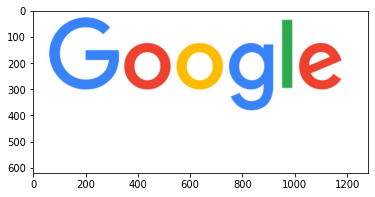

In [19]:
from pytesseract import image_to_string
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

##### Just a random picture from search
img = 'http://ohscurrent.org/wp-content/uploads/2015/09/domus-01-google.jpg'
img = requests.get(img)

img = Image.open(BytesIO(img.content))

# show image
img_arr = np.array(img)
plt.imshow(img_arr)

# img = Image.open(BytesIO(img.content))
# text = image_to_string(img)
# text
# img2 = requests.get('https://photos.renthop.com/2/8393298_6acaf11f030217d05f3a5604b9a2f70f.jpg')
# img2 = Image.open(BytesIO(img2.content))
# img2 = np.array(img2)
# plt.imshow(img2)

Example for biến đổi dữ liệu 


In [ ]:
Phân phối chuẩn

In [21]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import beta
from scipy.stats import shapiro
import statsmodels.api as sm 
import numpy as np

# Tạo ra một chuỗi phân phối beta
data = beta(1, 10).rvs(1000).reshape(-1, 1)
print('data shape: ', data.shape)
# print('data shape:%s'%str(data.shape))
# Sử dụng kiểm định shapiro để kiểm tra tính phân phối chuẩn.
shapiro(data)
# Giá trị tới hạn và p-value
shapiro(StandardScaler().fit_transform(data))

# Giá trị tới hạn > p-value chúng ta sẽ bác bỏ giả thuyết về phân phối chuẩn.


data shape:  (1000, 1)


(0.8350937366485596, 6.477250819499858e-31)

In [ ]:
# Scale theo phân phối chuẩn đối với biến prices trong bộ dữ liệu dataset.
# biến đổi dữ liệu theo phân phối chuẩn:
price = np.float64(dataset.price.values)
print('Head 5 of original prices:', price[:5])
price_std = StandardScaler().fit_transform(price.reshape(-1, 1))
print('Head 5 of standard scaling prices:\n', price_std[:5])
# Biến đổi trên tương đương với công thức sau:
price_std = (price - price.mean()) / price.std()
print('Head 5 of standard scaling prices:\n', price_std[:5])


Phương pháp thống kê


In [22]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.datasets import make_classification

#lấy dữ liệu example từ packgae sklearn
X,y = make_classification()

print('X: \n', X[:5, :5])
print('y: \n', y)
print('X shape:', X.shape)
print('y shape:', y.shape)

X: 
 [[-0.55188197 -0.20650043  0.74885637  1.90157715  0.76747941]
 [-0.29691527 -1.57686324  1.33894017 -0.27659804 -2.16156631]
 [ 0.4672625  -0.35683469  0.16131097  0.71025467  0.23182586]
 [-0.06118544  0.85780688  0.75705813 -0.80598192 -0.42952293]
 [-0.2131093  -1.01589743 -0.62400783 -0.26468778  0.03602743]]
y: 
 [1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0
 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1
 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0]
X shape: (100, 20)
y shape: (100,)


In [23]:
VarianceThreshold(.5).fit_transform(X).shape


(100, 20)

In [24]:
#nâng ngưỡng lên 0.9  nếu toàn bộ phương sai đều >0.5
VarianceThreshold(0.9).fit_transform(X).shape


(100, 16)

**Lựa chọn đặc trưng nào quan trọng bằng cách sử dụng grid search **
***cách làm***: 
- huấn luyện mô hình trên một tập dữ liệu con >> lưu lại kết quả train
- lặp lại quán trình huấn luyện trên những mẫu con khác >> so sánh chất lượng mô hình dự đoán để tìm ra một tập các biến tốt nhất

Nhược điểm: nếu tìm kiếm trên toàn bộ các bộ kết hợp tham số của mô hình thì sẽ rất lâu. >> cần giới hạn ko gian search space. 
**Phương pháp Sequence Feature Selection**
Ý tưởng của Sequential Feature Selection có thể thực hiện ngược lại theo cách cố định một tập hợp lớn nhất các biến, sau đó loại lần lượt các biến cho đến khi các phẩm chất của mô hình không còn được cải thiện. Khi đó bộ kết hợp các biến tối ưu sẽ được lựa chọn. Bên dưới ta sẽ tiến hành sử dụng phương pháp lựa chọn grid search đối với Sequential Feature Selection.
- Cố định trước 1 lượng biến N, đi qua lần lượt các kết hợp của toàn bộ N biến đó và lựa chọn ra bộ kết hợp tốt nhất
Khi xét với N+1 biến thì ta sẽ cố định bộ kết hợp tốt nhất của N biến trước đó và chỉ thêm 1 biến mới vào bộ kết hợp này. Quá trình này tiếp tục cho đến khi số lượng các biến đạt mức tối đa hoặc tới khi hàm loss fuction mô hình không giảm nữa


In [27]:
#phương pháp lựa chọn grid search đối với Sequential Feature Selection 
!{sys.executable} -m pip install mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector


In [ ]:

selector = SequentialFeatureSelector(estimator, scoring = 'accuracy', 
                                     verbose =2,
                                     k_features = 3,
                                     forward = False,
                                     n_jobs = -1)
selector.fit(X,y)


Summary
**Tổng hợp lại các phương pháp feature engineering:**

*Trích lọc feature*: Ứng dụng trong deep learning như xử lý ảnh và xử lý ngôn ngữ tự nhiên, phân rã thời gian, làm việc với dữ liệu địa lý, dữ liệu người dùng tracking từ các hệ thống web, app.
*Biến đổi feature*: Minmax scaling, Unit length scaling, Standardization.
*Lựa chọn feature*: Sử dụng phương pháp thống kê, mô hình hoặc grid search.
Câu hỏi đặt ra:

**Ý tưởng về Feature Engineering rất nhiều? Làm thế nào để tìm ra một Feature Engineering tối ưu?**

Try & Fail 